<a href="https://colab.research.google.com/github/cyberdefender001/mohirdev.praktika/blob/main/my_first_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning

### Portfolio uchun vazifa: Toshkent shahrida uylarning narxini aniqlash.

Ushbu amaliyotda sizning vazifangiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy narxi

## Vazifani CRSIP-DM Metolodgiyasi yordamida bajaring.
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


In [ ]:
df.describe()

,rooms,level,max_levels
count,7565.000000,7565.000000,7565.000000
mean,2.625644,3.699273,6.038202
std,1.085201,2.237275,2.613271
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,4.000000
50%,3.000000,3.000000,5.000000
75%,3.000000,5.000000,9.000000
max,10.000000,19.000000,25.000000


Price ustunini tozalash va int qiymatga o'tkazish

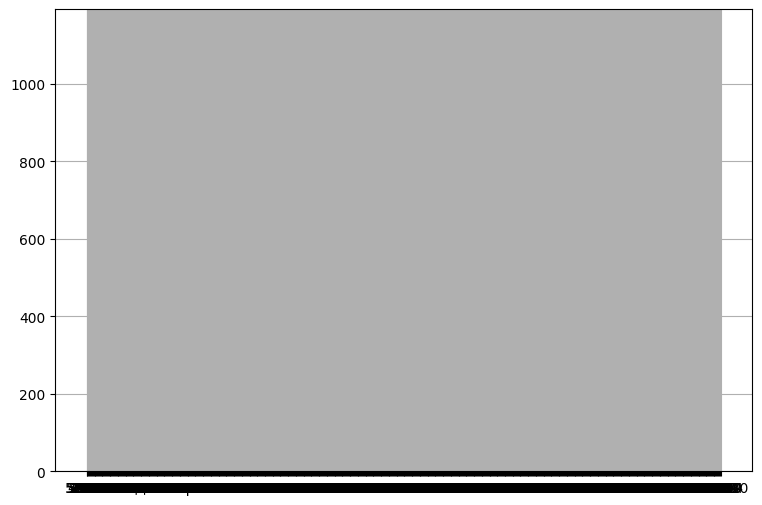

In [ ]:
%matplotlib inline
df['price'].hist(bins=40, figsize=(9,6))
plt.show()

In [ ]:
df[df['price'].str.len() == 1]
df.drop(7224, inplace = True)
df[df['price'].str.len() == 8]
df.drop([5903, 6952], inplace = True)
idx = df[df['price'].str.len() == 7].index
df.drop(idx, inplace = True)
idx = df[df['price'].str.len() == 4].index
df.drop(idx, inplace = True)
idx = df[df['price'].str.len() == 10].index
df.drop(idx, inplace = True)

In [ ]:
 df['price'] = df['price'].astype('int')

In [ ]:
df[df['size'].str.len() == 17]
df.drop(5347, inplace=True)

In [ ]:
idx = df[df['size'].str.len() == 1].index
df.drop(idx, inplace=True)

In [ ]:
idx = df[df['size'].str.len() == 4].index
df.drop(idx, inplace=True)

In [ ]:
df[df['size'].str.len() == 2]

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000
...,...,...,...,...,...,...,...
7560,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,38,5,5,24500
7561,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2,49,1,4,32000
7562,"город Ташкент, Шайхантахурский район, Зульфиях...",Шайхантахурский,2,64,3,9,40000
7563,"город Ташкент, Мирзо-Улугбекский район, Буюк И...",Мирзо-Улугбекский,1,18,1,4,11000


In [ ]:
df['size'].str.len().value_counts()

2    6047
3    1185
5     182
6      16
Name: size, dtype: int64

In [ ]:
df['size'] = df['size'].astype('float')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7430 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7430 non-null   object 
 1   district    7430 non-null   object 
 2   rooms       7430 non-null   int64  
 3   size        7430 non-null   float64
 4   level       7430 non-null   int64  
 5   max_levels  7430 non-null   int64  
 6   price       7430 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 464.4+ KB


In [ ]:
df

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57.0,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52.0,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42.0,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65.0,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70.0,3,5,55000
...,...,...,...,...,...,...,...
7560,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,38.0,5,5,24500
7561,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2,49.0,1,4,32000
7562,"город Ташкент, Шайхантахурский район, Зульфиях...",Шайхантахурский,2,64.0,3,9,40000
7563,"город Ташкент, Мирзо-Улугбекский район, Буюк И...",Мирзо-Улугбекский,1,18.0,1,4,11000


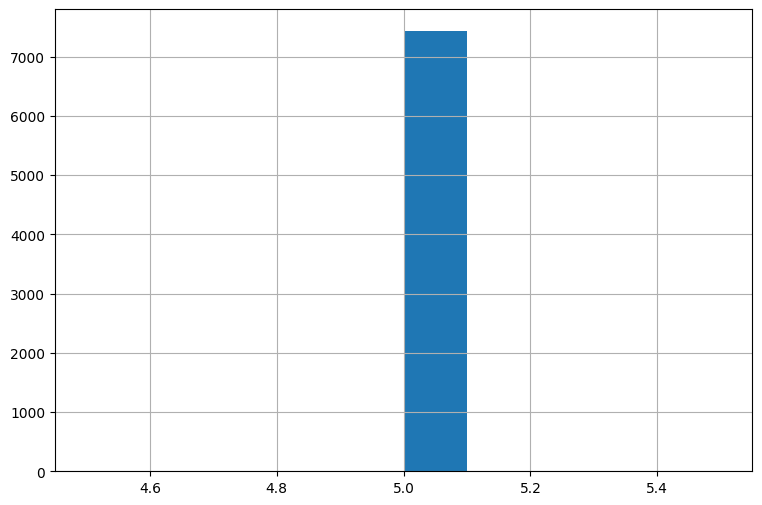

In [ ]:
df['price_cat'] = pd.cut(df['price'], bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1,2,3,4,5])
df['price_cat'].hist(figsize=(9,6))
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in stratified_split.split(df,df['price_cat']):
  strat_train_set = df.iloc[train_index]
  strat_test_set = df.iloc[test_index]

In [ ]:
strat_train_set.drop('price_cat', axis=1, inplace=True)
strat_test_set.drop('price_cat', axis=1, inplace=True)

<ipython-input-58-62f89fdf464f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strat_train_set.drop('price_cat', axis=1, inplace=True)
<ipython-input-58-62f89fdf464f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strat_test_set.drop('price_cat', axis=1, inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

Ma'lumotlarni tahlil qilamiz

In [ ]:
housing = strat_train_set.copy()

In [ ]:
housing_np = strat_train_set.drop(['price'], axis=1)

In [ ]:
housing_np

,location,district,rooms,size,level,max_levels
7287,"город Ташкент, Чиланзарский район, Чиланзар 8-...",Чиланзарский,1,32.0,3,4
6039,"город Ташкент, Янгихаётский район, Янги-Чаштепа",Янгихаётский,2,52.0,3,7
5455,"город Ташкент, Олмазорский район, Зиёвуддина Б...",Олмазорский,2,75.0,4,9
869,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,62.0,2,4
2233,"город Ташкент, Мирзо-Улугбекский район, Буюк И...",Мирзо-Улугбекский,2,47.0,3,9
...,...,...,...,...,...,...
3640,"город Ташкент, Сергелийский район, 1-й проезд ...",Сергелийский,5,130.0,5,9
20,"город Ташкент, Чиланзарский район, Чиланзар-9",Чиланзарский,2,51.0,2,4
1878,"город Ташкент, Учтепинский район, Чиланзар 24-...",Учтепинский,2,50.0,4,4
151,"город Ташкент, Мирзо-Улугбекский район, Карасу...",Мирзо-Улугбекский,2,67.0,2,4


In [ ]:
housing_num = housing.drop(['location', 'district', 'price'], axis=1)
housing_labels = housing['price'].copy()

In [ ]:
housing_num

,rooms,size,level,max_levels
7287,1,32.0,3,4
6039,2,52.0,3,7
5455,2,75.0,4,9
869,3,62.0,2,4
2233,2,47.0,3,9
...,...,...,...,...
3640,5,130.0,5,9
20,2,51.0,2,4
1878,2,50.0,4,4
151,2,67.0,2,4


In [ ]:
housing.sample(20)

,location,district,rooms,size,level,max_levels,price
4508,"город Ташкент, Мирабадский район, 1-й Нукусски...",Мирабадский,3,90.0,7,9,77000
193,"город Ташкент, Мирзо-Улугбекский район, Карасу...",Мирзо-Улугбекский,2,63.0,5,5,36000
2476,"город Ташкент, Шайхантахурский район, Самаркан...",Шайхантахурский,1,30.0,1,4,29000
5582,"город Ташкент, Чиланзарский район, Гулистан",Чиланзарский,5,110.0,3,5,78000
3251,"город Ташкент, Олмазорский район, Каракамыш кв...",Олмазорский,4,86.0,2,4,46000
5601,"город Ташкент, Чиланзарский район, Чиланзар",Чиланзарский,2,56.0,1,4,32000
3985,"город Ташкент, Сергелийский район, Сергели-VIII",Сергелийский,4,100.0,9,9,45000
1991,"город Ташкент, Мирзо-Улугбекский район, Буюк И...",Мирзо-Улугбекский,2,42.0,2,4,81000
531,"город Ташкент, Учтепинский район, Чиланзар-12",Учтепинский,1,30.0,2,4,20200
7482,"город Ташкент, Мирабадский район, Айбека (пр-т...",Мирабадский,3,68.0,8,9,82000


In [ ]:
housing.corrwith(df['price']).sort_values(ascending=False)

price         1.000000
rooms         0.558063
max_levels    0.218856
level         0.062082
size          0.019114
dtype: float64

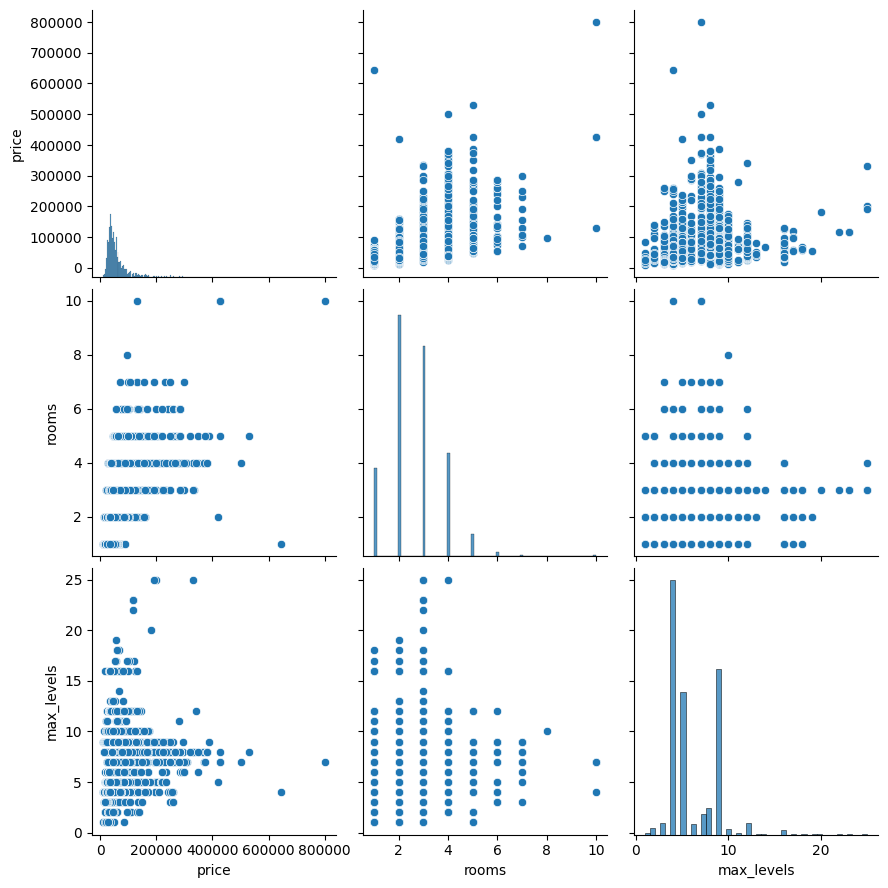

In [ ]:
cols = ['price', 'rooms', 'max_levels']
sns.pairplot(housing[cols], height=3)
plt.show()

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


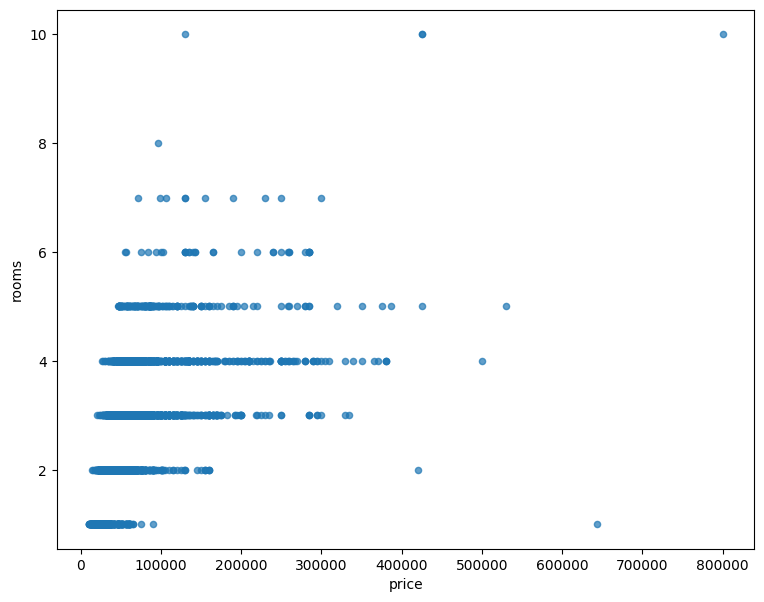

In [ ]:
housing.plot(kind='scatter', x='price', y='rooms', alpha=0.7, figsize=(9,7))
plt.show()

MIN MAX SCALING

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

min_max_scaler.fit_transform(housing_num)

array([[0.00000000e+00, 2.57194296e-04, 1.11111111e-01, 1.25000000e-01],
       [1.11111111e-01, 5.42965736e-04, 1.11111111e-01, 2.50000000e-01],
       [1.11111111e-01, 8.71602892e-04, 1.66666667e-01, 3.33333333e-01],
       ...,
       [1.11111111e-01, 5.14388592e-04, 1.66666667e-01, 1.25000000e-01],
       [1.11111111e-01, 7.57294316e-04, 5.55555556e-02, 1.25000000e-01],
       [1.11111111e-01, 4.00080016e-04, 5.55555556e-02, 1.66666667e-01]])

In [ ]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

standard_scaler.fit_transform(housing_num)

array([[-1.51827632, -0.05211251, -0.32182776, -0.78537676],
       [-0.58279021, -0.04015957, -0.32182776,  0.36605285],
       [-0.58279021, -0.02641369,  0.12221686,  1.13367259],
       ...,
       [-0.58279021, -0.04135486,  0.12221686, -0.78537676],
       [-0.58279021, -0.03119487, -0.76587238, -0.78537676],
       [-0.58279021, -0.04613604, -0.76587238, -0.40156689]])

In [ ]:
from sklearn.pipeline import Pipeline
#num_pipeline = Pipeline(['std_scaler', StandardScaler()])
num_pipeline = Pipeline([('std_scaler', StandardScaler())])

In [ ]:
housing_prepared = num_pipeline.fit_transform(housing_num)

Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()

In [ ]:
LR_model.fit(housing_prepared, housing_labels)

LinearRegression()

In [ ]:
housing_num

,rooms,size,level,max_levels
7287,1,32.0,3,4
6039,2,52.0,3,7
5455,2,75.0,4,9
869,3,62.0,2,4
2233,2,47.0,3,9
...,...,...,...,...
3640,5,130.0,5,9
20,2,51.0,2,4
1878,2,50.0,4,4
151,2,67.0,2,4


In [ ]:
test_data = housing_num.sample(10)
test_data

,rooms,size,level,max_levels
6137,3,72.0,9,9
6051,4,95.0,4,4
1609,4,107.0,8,9
4910,3,68.0,9,9
587,4,164.0,3,7
5103,3,120.0,2,4
6663,3,75.0,4,4
7266,4,95.0,12,16
406,2,60.0,1,4
4175,2,58.0,2,4


In [ ]:
test_label = housing_labels.loc[test_data.index]
test_label

6137     40000
6051     59900
1609    100000
4910     90000
587     120000
5103    160000
6663     34000
7266     47500
406      31999
4175     45000
Name: price, dtype: int64

In [ ]:
num_pipeline = Pipeline([('std_scaler', StandardScaler())])
test_data_prepared = num_pipeline.fit_transform(test_data)
test_data_prepared

array([[-0.26726124, -0.62443045,  1.00466203,  0.5383819 ],
       [ 1.06904497,  0.11587369, -0.3907019 , -0.80757285],
       [ 1.06904497,  0.50211933,  0.72558924,  0.5383819 ],
       [-0.26726124, -0.753179  ,  1.00466203,  0.5383819 ],
       [ 1.06904497,  2.33678612, -0.66977469,  0.        ],
       [-0.26726124,  0.92055211, -0.94884747, -0.80757285],
       [-0.26726124, -0.52786904, -0.3907019 , -0.80757285],
       [ 1.06904497,  0.11587369,  1.84188039,  2.42271856],
       [-1.60356745, -1.01067609, -1.22792026, -0.80757285],
       [-1.60356745, -1.07505037, -0.94884747, -0.80757285]])

In [ ]:
predicted_labels = LR_model.predict(test_data_prepared)

In [ ]:
predicted_labels

array([51183.7232456 , 79692.50709817, 85484.55743798, 51145.23235136,
       89278.41468275, 50836.08902353, 47158.36466058, 95912.05491743,
       19539.38854496, 17897.79219645])

In [ ]:
pd.DataFrame({'Bashorat':predicted_labels, 'Real':test_label})

,Bashorat,Real
6137,51183.723246,40000
6051,79692.507098,59900
1609,85484.557438,100000
4910,51145.232351,90000
587,89278.414683,120000
5103,50836.089024,160000
6663,47158.364661,34000
7266,95912.054917,47500
406,19539.388545,31999
4175,17897.792196,45000


In [ ]:
X_test = strat_test_set.drop(['price', 'location', 'district'], axis=1)
X_test

,rooms,size,level,max_levels
3272,3,75.0,6,10
7370,1,28.0,3,4
2224,2,64.0,1,4
3567,4,100.0,7,9
678,4,109.0,5,9
...,...,...,...,...
2938,2,63.0,5,9
1999,5,300.0,3,8
160,5,107.0,5,5
1524,1,43.0,4,9


In [ ]:
y_test = strat_test_set['price'].copy()
y_test

3272    115000
7370     26500
2224     65000
3567     45800
678      55000
         ...  
2938     39500
1999    425000
160      50000
1524     35000
1663    103000
Name: price, Length: 1486, dtype: int64

In [ ]:
X_test_prepared = num_pipeline.fit_transform(X_test)

In [ ]:
y_predicted = LR_model.predict(X_test_prepared)

In [ ]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test, y_predicted)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

44241.20757341622


In [ ]:
housing_labels

7287    28500
6039    41000
5455    41500
869     40500
2233    46500
        ...  
3640    64000
20      24200
1878    33000
151     36500
1899    33500
Name: price, Length: 5944, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()
tree_model.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [ ]:
y_predicted = tree_model.predict(X_test_prepared)

In [ ]:
lin_mse = mean_squared_error(y_test, y_predicted)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

95843.22092640329


In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [ ]:
y_predicted = RF_model.predict(X_test_prepared)

In [ ]:
lin_mse = mean_squared_error(y_test, y_predicted)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

90990.99036046206


In [ ]:
X = df.drop(["price","location","district","price_cat"], axis=1)
y = df["price"].copy()

X_prepared = num_pipeline.transform(X)

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std.dev:", scores.std())

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(LR_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)

In [ ]:
display_scores(LR_rmse_scores)

Scores: [34041.01774986 25000.11948434 48807.19166228 37149.28781397
 44745.2241801  37698.4061528  48151.50759825 37347.34085817
 29988.56738923 33318.09204084]
Mean: 37624.67549298309
Std.dev: 7320.875938353562


In [ ]:
scores = cross_val_score(tree_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [20210.33216146 21731.36914179 43164.60955967 35600.95099934
 32141.02415762 28357.41658731 35431.61144811 24744.17663961
 30408.85771351 24933.44168917]
Mean: 29672.379009758442
Std.dev: 6767.993935121666


In [ ]:
scores = cross_val_score(RF_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [16639.83654854 17768.75010637 33222.78547456 31363.496838
 29270.45214471 24431.4583055  31648.12702615 22587.29169406
 21291.66799456 23168.30796396]
Mean: 25139.217409641355
Std.dev: 5619.460503795612


Modelni saqlash

In [ ]:
import joblib

filename = 'RF_model.jbl' # faylga istalgan nom beramiz
joblib.dump(RF_model, filename)

['RF_model.jbl']

In [ ]:
model = joblib.load(filename)

In [ ]:
scores = cross_val_score(model, X_prepared, y, scoring="neg_mean_squared_error", cv=5)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [17633.85066774 33891.90025409 26783.25632238 28019.29060299
 22020.08280054]
Mean: 25669.67612954827
Std.dev: 5518.32838627268


In [ ]:
filename = 'pipeline.jbl'
joblib.dump(num_pipeline, filename)

['pipeline.jbl']